# Autores: Fernando Rosendo e Eduardo Correia

In [145]:
import warnings
warnings.filterwarnings('ignore')
#O codigo acima é para o Jupyter Notebook, pode ignorar.

import numpy as np
import pandas as pd

# Criando dataset de exemplo

In [146]:
linhas_dataset = 100000 #cem mil linhas/eventos

In [147]:
df = pd.DataFrame({'SE(PREVISAO)':['C','NC'], 'CAPPI':[29.87,30.12], 'FEEDBACK APAC(REAL)':['NC','NC']})

In [148]:
#Checando como está o dataset
df

,SE(PREVISAO),CAPPI,FEEDBACK APAC(REAL)
0,C,29.87,NC
1,NC,30.12,NC


In [149]:
#Gerando um número numa distribuição normal centrada em 30
(np.random.randn() * 0.4) + 30

29.443048975863867

In [150]:
#Apenas testando o método choice.
np.random.choice(['C','NC'], 5)

array(['C', 'C', 'C', 'C', 'NC'], dtype='<U2')

In [151]:
df = pd.DataFrame({
    'SE(PREVISAO)':np.random.choice(['C','NC'], linhas_dataset),
    'CAPPI': (np.random.randn(linhas_dataset) * 0.4) + 30,
    'FEEDBACK APAC(REAL)':np.random.choice(['C','NC'], linhas_dataset)
})

In [152]:
df.head()

,SE(PREVISAO),CAPPI,FEEDBACK APAC(REAL)
0,NC,30.064525,NC
1,C,29.579989,C
2,NC,29.990006,C
3,C,29.688609,C
4,C,30.797197,C


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
SE(PREVISAO)           100000 non-null object
CAPPI                  100000 non-null float64
FEEDBACK APAC(REAL)    100000 non-null object
dtypes: float64(1), object(2)
memory usage: 2.3+ MB


## Criando dataset com feedback numérico da APAC, conforme orientado

Redefinindo o dataset

In [154]:
np.random.randint(0, 101,2)

array([57, 23])

In [155]:
df = pd.DataFrame({
    'SE(PREVISAO)':np.random.choice(['C','NC'], linhas_dataset),
    'CAPPI': (np.random.randn(linhas_dataset) * 0.4) + 30,
    'FEEDBACK APAC(REAL)':np.random.randint(0,101,linhas_dataset)
})

In [156]:
#Verificando como está o nosso dataset
df.head()

,SE(PREVISAO),CAPPI,FEEDBACK APAC(REAL)
0,C,29.843896,20
1,NC,30.563570,88
2,NC,29.450134,51
3,C,30.413677,55
4,C,29.977538,25


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
SE(PREVISAO)           100000 non-null object
CAPPI                  100000 non-null float64
FEEDBACK APAC(REAL)    100000 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


Agora que o nosso dataset está pronto, vamos checar se a distribuição dos valores do CAPPI está como esperado.

# Verificando distribuição do CAPPI artificial

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

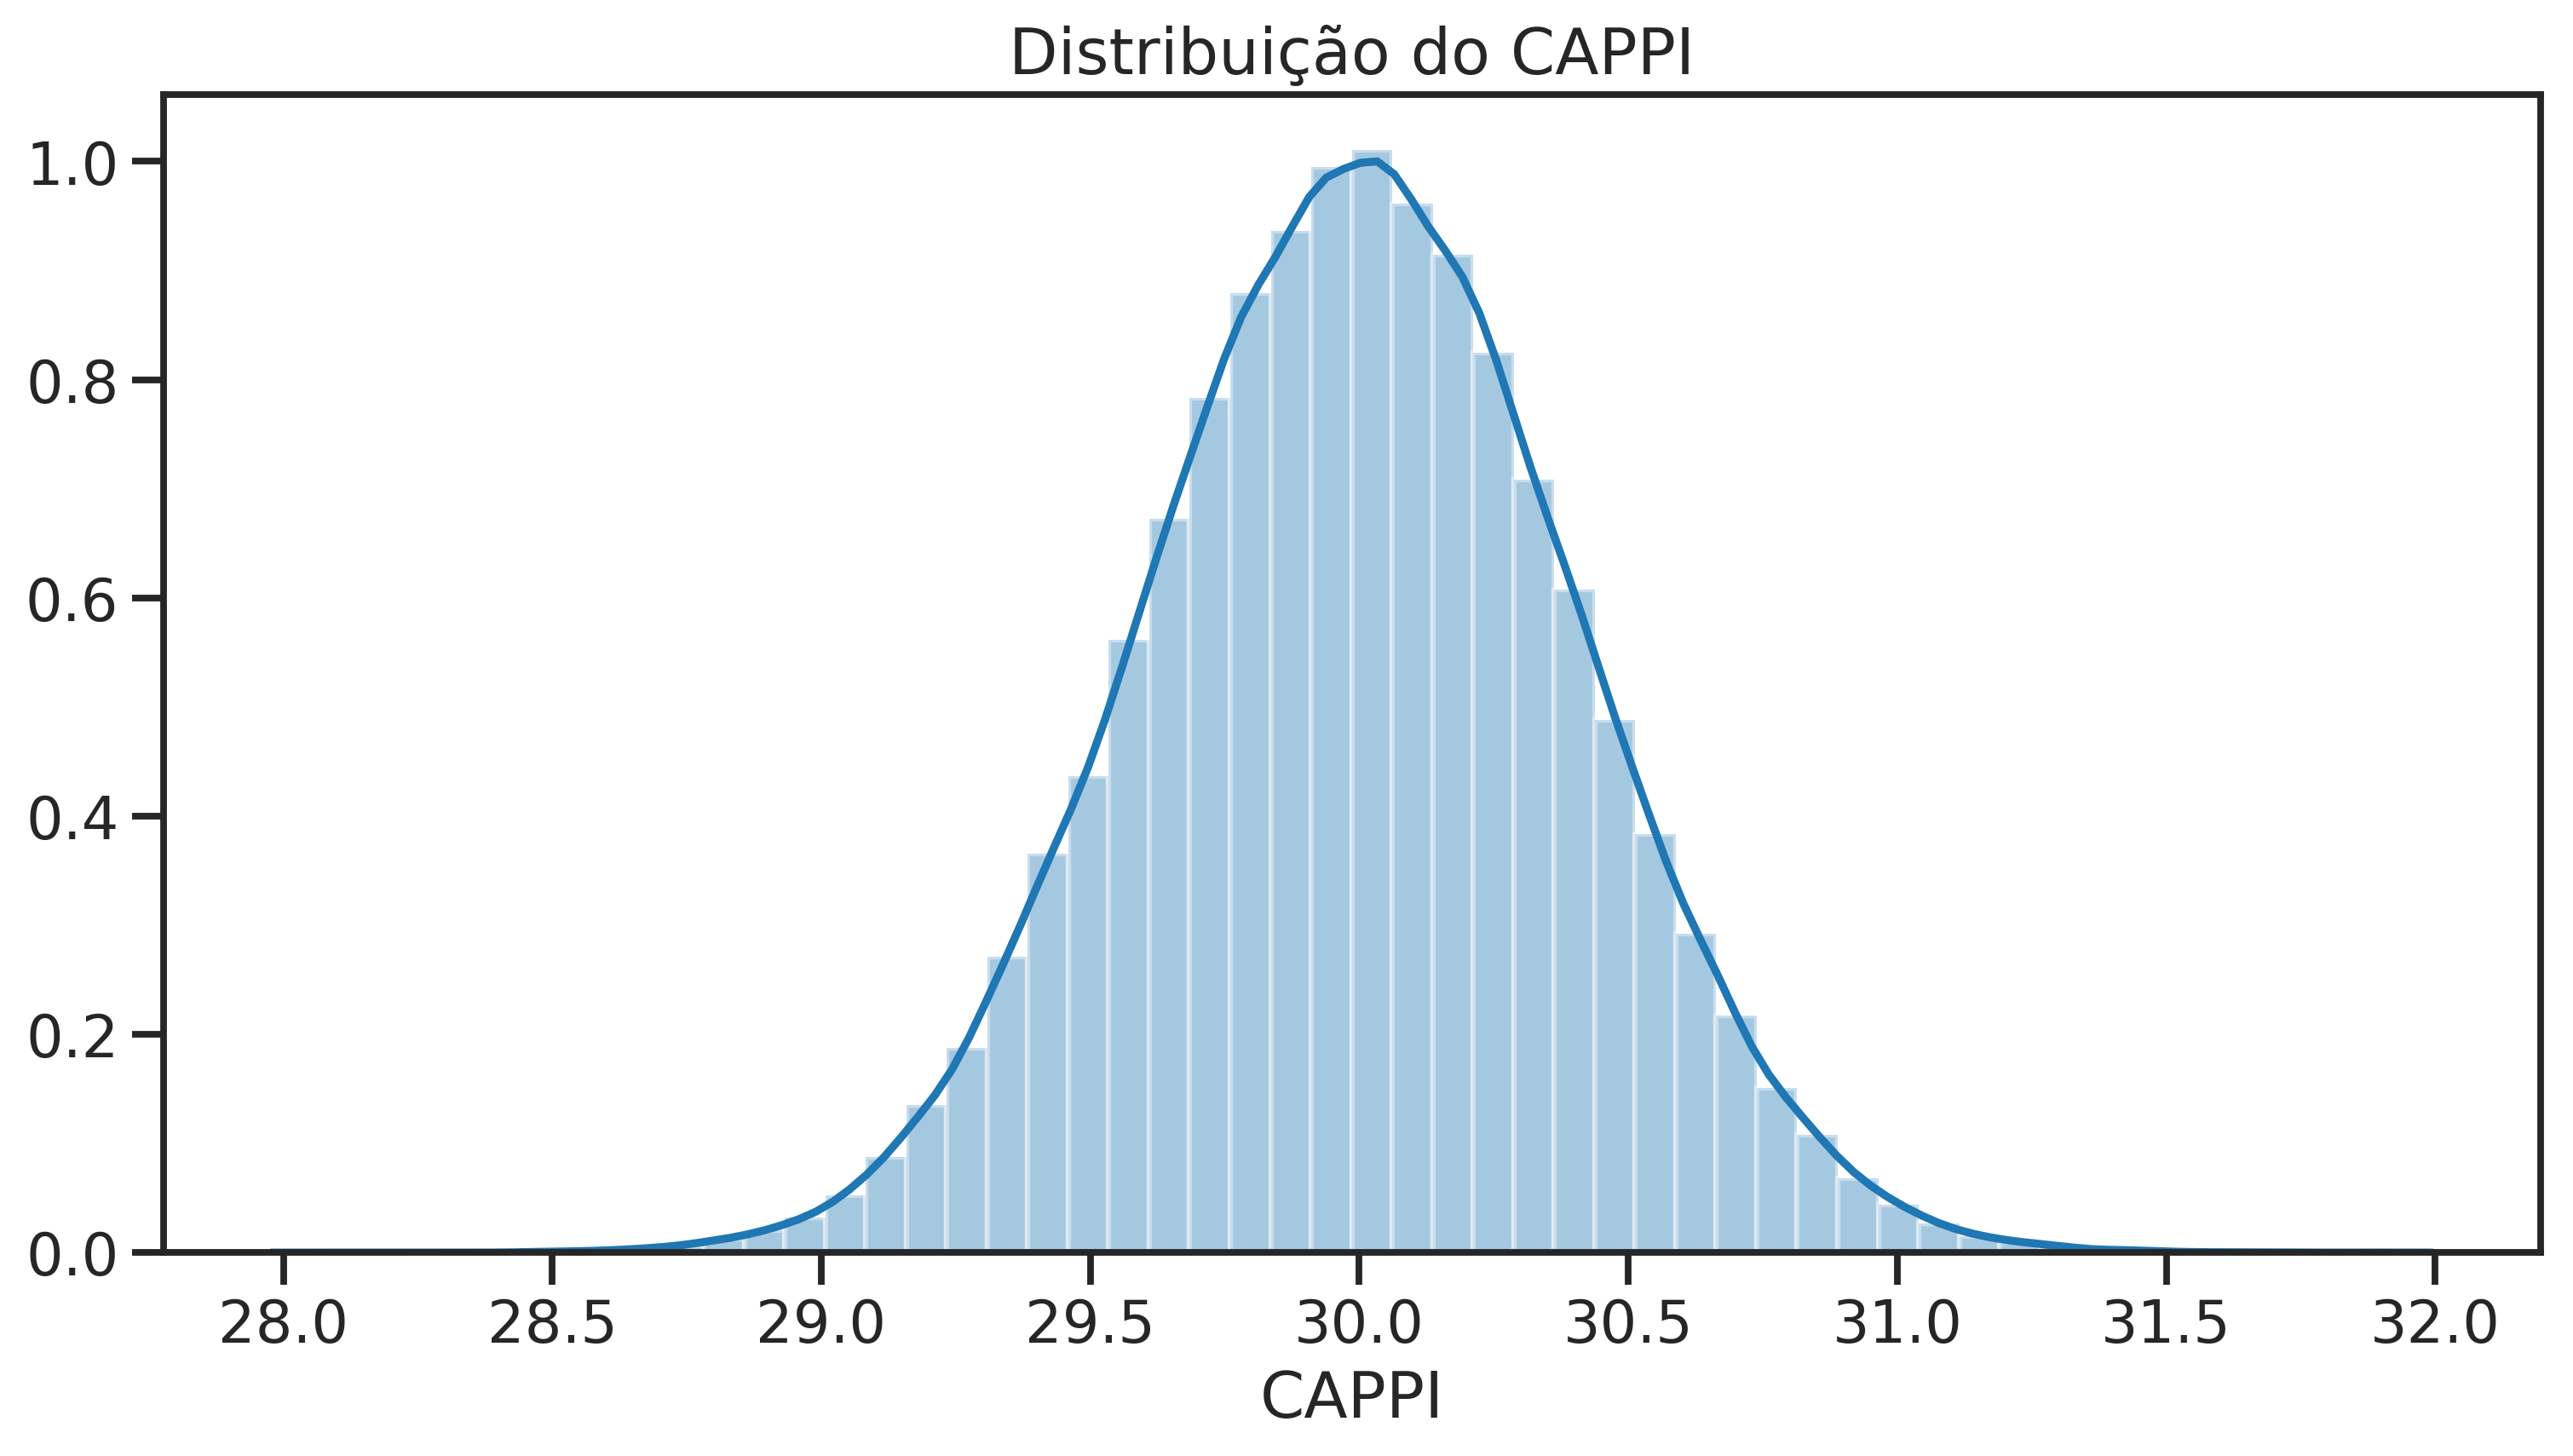

In [159]:
plt.figure(figsize=(12,6), dpi=300)

sns.set_style('ticks')

sns.set_context('talk')

plt.title('Distribuição do CAPPI')

sns.distplot(df['CAPPI'])

plt.savefig('distcappi.png')

# Criando Scatterplot

In [160]:
df.head()

,SE(PREVISAO),CAPPI,FEEDBACK APAC(REAL)
0,C,29.843896,20
1,NC,30.563570,88
2,NC,29.450134,51
3,C,30.413677,55
4,C,29.977538,25


<Figure size 3600x1800 with 0 Axes>

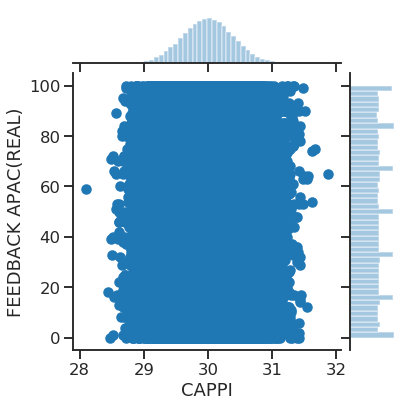

In [161]:
plt.figure(figsize=(12,6), dpi=300)

sns.jointplot('CAPPI','FEEDBACK APAC(REAL)', data=df)

plt.savefig('scattercapfeed.png')

# Treinando busca local

**Desistimos da biblioteca simpleai e simanneal**

## Implementando Simulated Annealing

In [162]:
df.head()

,SE(PREVISAO),CAPPI,FEEDBACK APAC(REAL)
0,C,29.843896,20
1,NC,30.563570,88
2,NC,29.450134,51
3,C,30.413677,55
4,C,29.977538,25


In [163]:
#Para utilizar isso, é melhor diminuir o número de linhas nesse caso artificial.

#plt.figure(figsize=(40,12), dpi=300)

#plt.title('Clássico Gráfico Busca Local')
#plt.ylabel('Função Objetivo')

#X = np.linspace(0, 1, linhas_dataset)
#plt.plot(X, df['FEEDBACK APAC(REAL)'].values)

#plt.savefig('graficoBuscaLocal.png')

**Ficou estranho o gráfico, mas isso é porque a distribuição dos valores do feedback artificial da APAC é uniforme.**

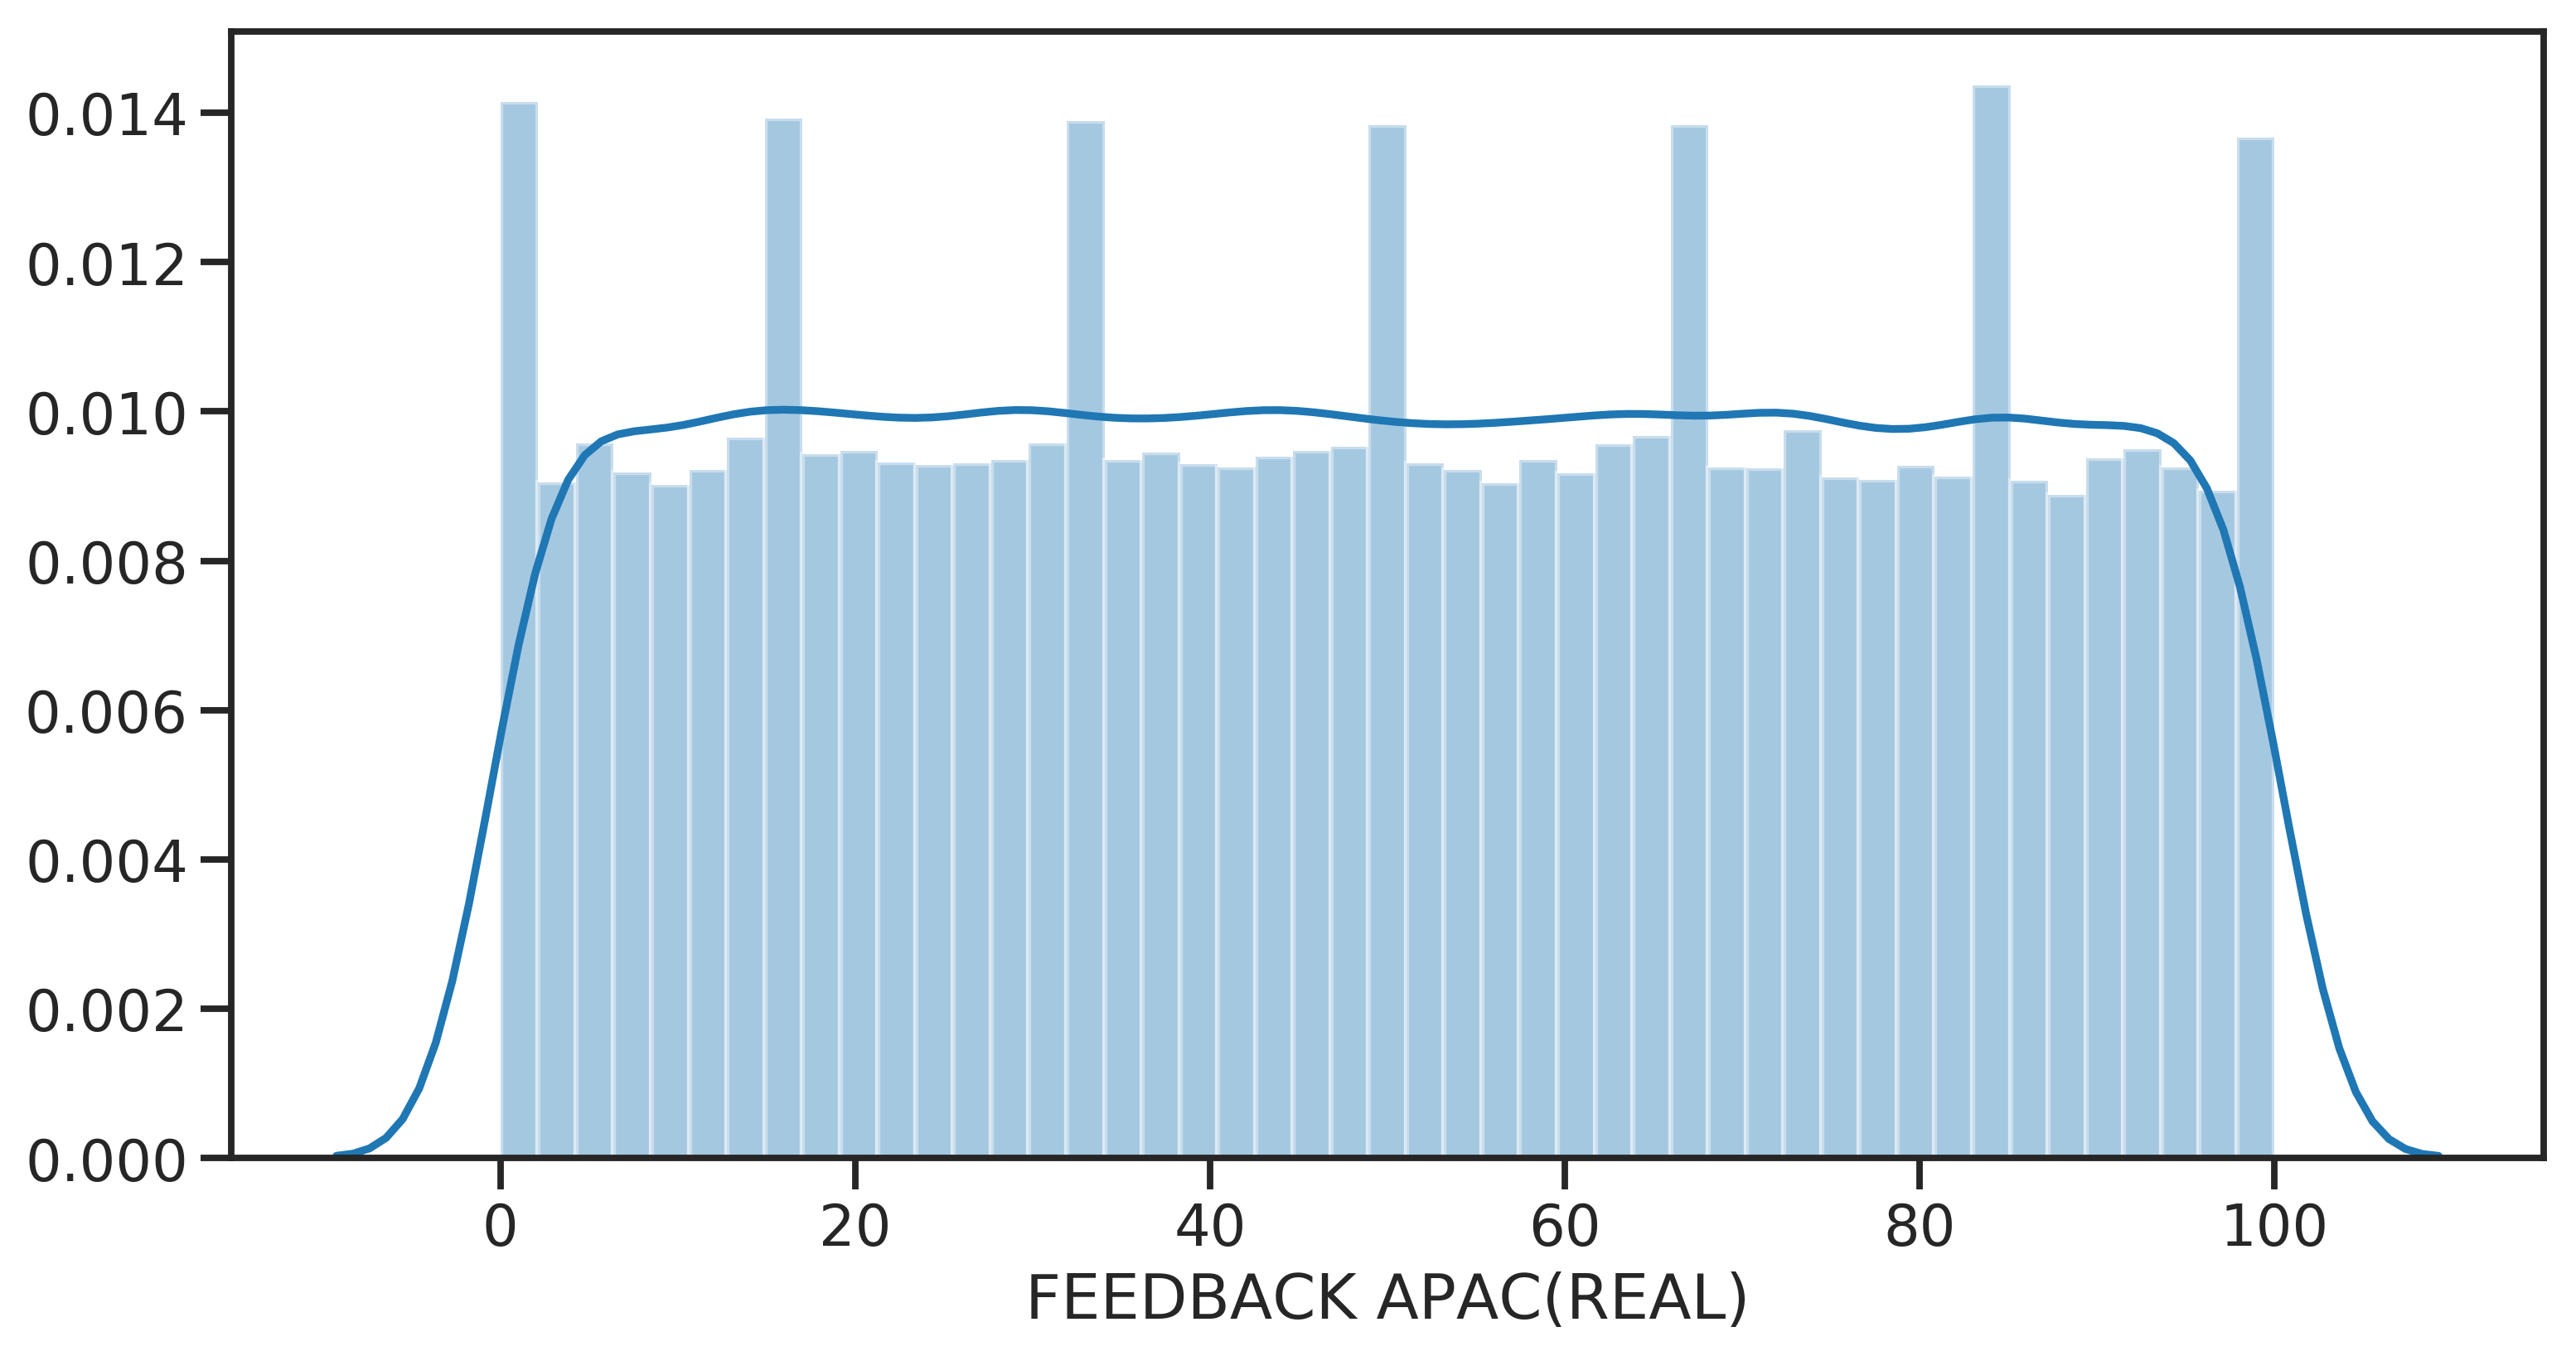

In [164]:
plt.figure(figsize=(12,6), dpi=300)

sns.set_style('ticks')

sns.set_context('talk')

sns.distplot(df['FEEDBACK APAC(REAL)'])

plt.savefig('distFeedbackAPAC.png')

### Código em si

In [165]:
def SA(espaco_busca, coluna_alvo, T=100, n_iter=1000):
    escala = np.sqrt(T) #T=100 por padrao
    inicio = np.random.choice(espaco_busca.values)
    x = inicio * 1
    current = df.loc[espaco_busca == x, coluna_alvo].values[0]
    history = [x]
    for i in range(n_iter): #1000 iteracoes por default
        prop = x + np.random.normal()*escala
        if prop > 1 or prop < 0 or np.log(np.random.randn()) * T > (prop - current):
            prop = x
        x = prop
        current = df.loc[espaco_busca == x, coluna_alvo].values
        T = 0.9 * T #reduzir temperatura em 10% a cada iteracao
        history.append(x)
    return x, history

In [166]:
valorCAPPI, historico = SA(espaco_busca=df['CAPPI'], coluna_alvo='FEEDBACK APAC(REAL)')
print(valorCAPPI)
print(historico[::50]) #pulando de 50 em 50, para não ficar tão poluído o relatório.

0.5716915654071223
[29.630036096833408, 29.630036096833408, 29.630036096833408, 29.630036096833408, 29.630036096833408, 29.630036096833408, 29.630036096833408, 29.630036096833408, 29.630036096833408, 29.630036096833408, 29.630036096833408, 29.630036096833408, 29.630036096833408, 29.630036096833408, 29.630036096833408, 29.630036096833408, 0.030019548161155263, 0.21883523328731969, 0.25842494181815306, 0.7657360047426816, 0.5716915654071223]


Nosso algoritmo diz todo o histórico da busca também, caso necessário. Mas o verdadeiro resultado está no primeiro item da tupla resultante.

In [167]:
SA(espaco_busca=df['CAPPI'], coluna_alvo='FEEDBACK APAC(REAL)')[0]
#Nao foi igual ao encontrado acima(ou talvez tenha sido... esse notebook é rodado várias vezes) porque estamos
#chamando novamente a busca local.

0.23545347324668475